In [1]:
!conda install keras

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

# Goal

Our goal is to create data that is 2 spiral arms, and then use tensorflow to classify between the arms

This is a very difficult problem for traditional classification techniques

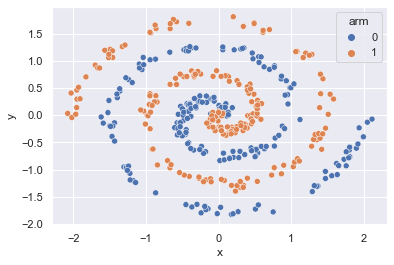

In [3]:
# generate some random points between 0-2
# there will be 2 loops of each spiral arm
nr = 200
r1 = 2*np.random.uniform(size=nr)
r2 = 2*np.random.uniform(size=nr)

# put them on a circle with radius increasing with angle (to make the first spiral arm)
# also add a little noise for each data point on the arm
x1 = r1*np.cos(2*np.pi*r1)+0.05*np.random.normal(size=nr)
y1 = r1*np.sin(2*np.pi*r1)+0.05*np.random.normal(size=nr)

# now put the second arm out of phase by 180 degrees
x2 = r2*np.cos(2*np.pi*r2 + np.pi)+0.05*np.random.normal(size=nr)
y2 = r2*np.sin(2*np.pi*r2 + np.pi)+0.05*np.random.normal(size=nr)

# first arm (x1,y1) gets labeled as 0, second arm (x2,y2) gets labeled as 1
arm = [0]*nr+[1]*nr

df = pd.DataFrame({'x':np.concatenate((x1,x2)), 'y':np.concatenate((y1,y2)),'arm':arm})

sns.scatterplot(data=df,x='x',y='y',hue='arm');

In [4]:
# pandas works well for plotting, but tensorflow needs np arrays
data = df.to_numpy()
xtrain = data[:,0:2]
ytrain = data[:,2]


In [5]:
# create a test set without the noise
rtest = np.linspace(0,2,num=51)
x1 = rtest*np.cos(2*np.pi*rtest)
y1 = rtest*np.sin(2*np.pi*rtest)

x2 = rtest*np.cos(2*np.pi*rtest + np.pi)
y2 = rtest*np.sin(2*np.pi*rtest + np.pi)

xtest = np.zeros((102,2))
xtest[0:51,0] = x1
xtest[51:,0] = x2
xtest[0:51,1] = y1
xtest[51:,1] = y2

ytest = np.zeros(102)
ytest[0:51] = 0
ytest[51:] = 1

xshape = (2,)


In [6]:
NNmodel_adagrad = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8,activation=tf.nn.relu,input_shape=xshape,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=11511)),
    tf.keras.layers.Dense(8,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=20)),
    tf.keras.layers.Dense(8,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=25)),
    tf.keras.layers.Dense(4,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=30)),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=35))])

NNmodel_adagrad.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.02),
              loss='binary_crossentropy',
              metrics=['accuracy'])

NNmodel_adagrad.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [7]:
NNmodel_adagrad.fit(xtrain,ytrain,epochs=1000,batch_size=10,validation_data = (xtest,ytest),verbose=2);

Epoch 1/1000
40/40 - 1s - loss: 0.6945 - accuracy: 0.5275 - val_loss: 0.6935 - val_accuracy: 0.5196
Epoch 2/1000
40/40 - 0s - loss: 0.6926 - accuracy: 0.5575 - val_loss: 0.6924 - val_accuracy: 0.5490
Epoch 3/1000
40/40 - 0s - loss: 0.6915 - accuracy: 0.5425 - val_loss: 0.6918 - val_accuracy: 0.4902
Epoch 4/1000
40/40 - 0s - loss: 0.6898 - accuracy: 0.5425 - val_loss: 0.6906 - val_accuracy: 0.4902
Epoch 5/1000
40/40 - 0s - loss: 0.6883 - accuracy: 0.5525 - val_loss: 0.6893 - val_accuracy: 0.5294
Epoch 6/1000
40/40 - 0s - loss: 0.6867 - accuracy: 0.5650 - val_loss: 0.6881 - val_accuracy: 0.5196
Epoch 7/1000
40/40 - 0s - loss: 0.6854 - accuracy: 0.5750 - val_loss: 0.6873 - val_accuracy: 0.5098
Epoch 8/1000
40/40 - 0s - loss: 0.6844 - accuracy: 0.5625 - val_loss: 0.6862 - val_accuracy: 0.5588
Epoch 9/1000
40/40 - 0s - loss: 0.6836 - accuracy: 0.5575 - val_loss: 0.6851 - val_accuracy: 0.5588
Epoch 10/1000
40/40 - 0s - loss: 0.6823 - accuracy: 0.5700 - val_loss: 0.6835 - val_accuracy: 0.5882

Epoch 83/1000
40/40 - 0s - loss: 0.6281 - accuracy: 0.6775 - val_loss: 0.6413 - val_accuracy: 0.6667
Epoch 84/1000
40/40 - 0s - loss: 0.6274 - accuracy: 0.6800 - val_loss: 0.6410 - val_accuracy: 0.6471
Epoch 85/1000
40/40 - 0s - loss: 0.6257 - accuracy: 0.6850 - val_loss: 0.6392 - val_accuracy: 0.6667
Epoch 86/1000
40/40 - 0s - loss: 0.6252 - accuracy: 0.6750 - val_loss: 0.6402 - val_accuracy: 0.6471
Epoch 87/1000
40/40 - 0s - loss: 0.6241 - accuracy: 0.6775 - val_loss: 0.6389 - val_accuracy: 0.6471
Epoch 88/1000
40/40 - 0s - loss: 0.6225 - accuracy: 0.6825 - val_loss: 0.6374 - val_accuracy: 0.6667
Epoch 89/1000
40/40 - 0s - loss: 0.6221 - accuracy: 0.6800 - val_loss: 0.6364 - val_accuracy: 0.6569
Epoch 90/1000
40/40 - 0s - loss: 0.6209 - accuracy: 0.6825 - val_loss: 0.6367 - val_accuracy: 0.6569
Epoch 91/1000
40/40 - 0s - loss: 0.6199 - accuracy: 0.6825 - val_loss: 0.6360 - val_accuracy: 0.6569
Epoch 92/1000
40/40 - 0s - loss: 0.6192 - accuracy: 0.6775 - val_loss: 0.6351 - val_accurac

Epoch 164/1000
40/40 - 0s - loss: 0.5634 - accuracy: 0.7350 - val_loss: 0.6013 - val_accuracy: 0.7255
Epoch 165/1000
40/40 - 0s - loss: 0.5637 - accuracy: 0.7300 - val_loss: 0.6018 - val_accuracy: 0.7157
Epoch 166/1000
40/40 - 0s - loss: 0.5626 - accuracy: 0.7325 - val_loss: 0.6008 - val_accuracy: 0.7157
Epoch 167/1000
40/40 - 0s - loss: 0.5623 - accuracy: 0.7350 - val_loss: 0.6010 - val_accuracy: 0.7157
Epoch 168/1000
40/40 - 0s - loss: 0.5616 - accuracy: 0.7350 - val_loss: 0.5998 - val_accuracy: 0.7255
Epoch 169/1000
40/40 - 0s - loss: 0.5614 - accuracy: 0.7350 - val_loss: 0.5990 - val_accuracy: 0.7255
Epoch 170/1000
40/40 - 0s - loss: 0.5613 - accuracy: 0.7325 - val_loss: 0.5998 - val_accuracy: 0.7255
Epoch 171/1000
40/40 - 0s - loss: 0.5610 - accuracy: 0.7300 - val_loss: 0.5999 - val_accuracy: 0.7255
Epoch 172/1000
40/40 - 0s - loss: 0.5603 - accuracy: 0.7350 - val_loss: 0.5995 - val_accuracy: 0.7255
Epoch 173/1000
40/40 - 0s - loss: 0.5597 - accuracy: 0.7325 - val_loss: 0.6005 - v

Epoch 245/1000
40/40 - 0s - loss: 0.5347 - accuracy: 0.7375 - val_loss: 0.5827 - val_accuracy: 0.7255
Epoch 246/1000
40/40 - 0s - loss: 0.5343 - accuracy: 0.7400 - val_loss: 0.5819 - val_accuracy: 0.7255
Epoch 247/1000
40/40 - 0s - loss: 0.5343 - accuracy: 0.7400 - val_loss: 0.5812 - val_accuracy: 0.7255
Epoch 248/1000
40/40 - 0s - loss: 0.5336 - accuracy: 0.7375 - val_loss: 0.5819 - val_accuracy: 0.7255
Epoch 249/1000
40/40 - 0s - loss: 0.5333 - accuracy: 0.7350 - val_loss: 0.5814 - val_accuracy: 0.7255
Epoch 250/1000
40/40 - 0s - loss: 0.5333 - accuracy: 0.7350 - val_loss: 0.5810 - val_accuracy: 0.7255
Epoch 251/1000
40/40 - 0s - loss: 0.5330 - accuracy: 0.7350 - val_loss: 0.5814 - val_accuracy: 0.7255
Epoch 252/1000
40/40 - 0s - loss: 0.5325 - accuracy: 0.7375 - val_loss: 0.5810 - val_accuracy: 0.7255
Epoch 253/1000
40/40 - 0s - loss: 0.5324 - accuracy: 0.7350 - val_loss: 0.5800 - val_accuracy: 0.7255
Epoch 254/1000
40/40 - 0s - loss: 0.5320 - accuracy: 0.7375 - val_loss: 0.5802 - v

Epoch 326/1000
40/40 - 0s - loss: 0.5136 - accuracy: 0.7400 - val_loss: 0.5678 - val_accuracy: 0.7255
Epoch 327/1000
40/40 - 0s - loss: 0.5130 - accuracy: 0.7425 - val_loss: 0.5670 - val_accuracy: 0.7255
Epoch 328/1000
40/40 - 0s - loss: 0.5131 - accuracy: 0.7400 - val_loss: 0.5692 - val_accuracy: 0.7353
Epoch 329/1000
40/40 - 0s - loss: 0.5131 - accuracy: 0.7425 - val_loss: 0.5689 - val_accuracy: 0.7353
Epoch 330/1000
40/40 - 0s - loss: 0.5127 - accuracy: 0.7425 - val_loss: 0.5689 - val_accuracy: 0.7353
Epoch 331/1000
40/40 - 0s - loss: 0.5127 - accuracy: 0.7450 - val_loss: 0.5691 - val_accuracy: 0.7353
Epoch 332/1000
40/40 - 0s - loss: 0.5123 - accuracy: 0.7425 - val_loss: 0.5693 - val_accuracy: 0.7353
Epoch 333/1000
40/40 - 0s - loss: 0.5124 - accuracy: 0.7425 - val_loss: 0.5691 - val_accuracy: 0.7353
Epoch 334/1000
40/40 - 0s - loss: 0.5118 - accuracy: 0.7450 - val_loss: 0.5678 - val_accuracy: 0.7353
Epoch 335/1000
40/40 - 0s - loss: 0.5117 - accuracy: 0.7450 - val_loss: 0.5676 - v

Epoch 407/1000
40/40 - 0s - loss: 0.4994 - accuracy: 0.7450 - val_loss: 0.5584 - val_accuracy: 0.7255
Epoch 408/1000
40/40 - 0s - loss: 0.4996 - accuracy: 0.7450 - val_loss: 0.5584 - val_accuracy: 0.7255
Epoch 409/1000
40/40 - 0s - loss: 0.4989 - accuracy: 0.7400 - val_loss: 0.5591 - val_accuracy: 0.7255
Epoch 410/1000
40/40 - 0s - loss: 0.4989 - accuracy: 0.7450 - val_loss: 0.5573 - val_accuracy: 0.7255
Epoch 411/1000
40/40 - 0s - loss: 0.4991 - accuracy: 0.7400 - val_loss: 0.5577 - val_accuracy: 0.7255
Epoch 412/1000
40/40 - 0s - loss: 0.4989 - accuracy: 0.7450 - val_loss: 0.5574 - val_accuracy: 0.7255
Epoch 413/1000
40/40 - 0s - loss: 0.4984 - accuracy: 0.7450 - val_loss: 0.5567 - val_accuracy: 0.7255
Epoch 414/1000
40/40 - 0s - loss: 0.4984 - accuracy: 0.7450 - val_loss: 0.5573 - val_accuracy: 0.7255
Epoch 415/1000
40/40 - 0s - loss: 0.4982 - accuracy: 0.7425 - val_loss: 0.5582 - val_accuracy: 0.7255
Epoch 416/1000
40/40 - 0s - loss: 0.4980 - accuracy: 0.7475 - val_loss: 0.5562 - v

Epoch 488/1000
40/40 - 0s - loss: 0.4878 - accuracy: 0.7450 - val_loss: 0.5513 - val_accuracy: 0.7353
Epoch 489/1000
40/40 - 0s - loss: 0.4879 - accuracy: 0.7475 - val_loss: 0.5511 - val_accuracy: 0.7353
Epoch 490/1000
40/40 - 0s - loss: 0.4878 - accuracy: 0.7450 - val_loss: 0.5505 - val_accuracy: 0.7353
Epoch 491/1000
40/40 - 0s - loss: 0.4875 - accuracy: 0.7450 - val_loss: 0.5497 - val_accuracy: 0.7353
Epoch 492/1000
40/40 - 0s - loss: 0.4875 - accuracy: 0.7425 - val_loss: 0.5507 - val_accuracy: 0.7353
Epoch 493/1000
40/40 - 0s - loss: 0.4872 - accuracy: 0.7450 - val_loss: 0.5514 - val_accuracy: 0.7255
Epoch 494/1000
40/40 - 0s - loss: 0.4872 - accuracy: 0.7450 - val_loss: 0.5502 - val_accuracy: 0.7353
Epoch 495/1000
40/40 - 0s - loss: 0.4869 - accuracy: 0.7450 - val_loss: 0.5512 - val_accuracy: 0.7255
Epoch 496/1000
40/40 - 0s - loss: 0.4872 - accuracy: 0.7450 - val_loss: 0.5495 - val_accuracy: 0.7255
Epoch 497/1000
40/40 - 0s - loss: 0.4867 - accuracy: 0.7450 - val_loss: 0.5490 - v

Epoch 569/1000
40/40 - 0s - loss: 0.4790 - accuracy: 0.7500 - val_loss: 0.5452 - val_accuracy: 0.7255
Epoch 570/1000
40/40 - 0s - loss: 0.4790 - accuracy: 0.7475 - val_loss: 0.5450 - val_accuracy: 0.7353
Epoch 571/1000
40/40 - 0s - loss: 0.4791 - accuracy: 0.7450 - val_loss: 0.5451 - val_accuracy: 0.7353
Epoch 572/1000
40/40 - 0s - loss: 0.4787 - accuracy: 0.7450 - val_loss: 0.5451 - val_accuracy: 0.7353
Epoch 573/1000
40/40 - 0s - loss: 0.4785 - accuracy: 0.7450 - val_loss: 0.5441 - val_accuracy: 0.7353
Epoch 574/1000
40/40 - 0s - loss: 0.4786 - accuracy: 0.7475 - val_loss: 0.5438 - val_accuracy: 0.7353
Epoch 575/1000
40/40 - 0s - loss: 0.4783 - accuracy: 0.7450 - val_loss: 0.5439 - val_accuracy: 0.7353
Epoch 576/1000
40/40 - 0s - loss: 0.4783 - accuracy: 0.7475 - val_loss: 0.5432 - val_accuracy: 0.7353
Epoch 577/1000
40/40 - 0s - loss: 0.4780 - accuracy: 0.7450 - val_loss: 0.5455 - val_accuracy: 0.7353
Epoch 578/1000
40/40 - 0s - loss: 0.4782 - accuracy: 0.7475 - val_loss: 0.5451 - v

Epoch 650/1000
40/40 - 0s - loss: 0.4716 - accuracy: 0.7475 - val_loss: 0.5400 - val_accuracy: 0.7353
Epoch 651/1000
40/40 - 0s - loss: 0.4714 - accuracy: 0.7450 - val_loss: 0.5405 - val_accuracy: 0.7353
Epoch 652/1000
40/40 - 0s - loss: 0.4713 - accuracy: 0.7475 - val_loss: 0.5390 - val_accuracy: 0.7353
Epoch 653/1000
40/40 - 0s - loss: 0.4715 - accuracy: 0.7450 - val_loss: 0.5410 - val_accuracy: 0.7353
Epoch 654/1000
40/40 - 0s - loss: 0.4711 - accuracy: 0.7475 - val_loss: 0.5403 - val_accuracy: 0.7353
Epoch 655/1000
40/40 - 0s - loss: 0.4710 - accuracy: 0.7475 - val_loss: 0.5406 - val_accuracy: 0.7353
Epoch 656/1000
40/40 - 0s - loss: 0.4710 - accuracy: 0.7475 - val_loss: 0.5379 - val_accuracy: 0.7353
Epoch 657/1000
40/40 - 0s - loss: 0.4709 - accuracy: 0.7475 - val_loss: 0.5401 - val_accuracy: 0.7353
Epoch 658/1000
40/40 - 0s - loss: 0.4708 - accuracy: 0.7475 - val_loss: 0.5400 - val_accuracy: 0.7353
Epoch 659/1000
40/40 - 0s - loss: 0.4707 - accuracy: 0.7450 - val_loss: 0.5410 - v

Epoch 731/1000
40/40 - 0s - loss: 0.4652 - accuracy: 0.7475 - val_loss: 0.5370 - val_accuracy: 0.7451
Epoch 732/1000
40/40 - 0s - loss: 0.4650 - accuracy: 0.7475 - val_loss: 0.5356 - val_accuracy: 0.7353
Epoch 733/1000
40/40 - 0s - loss: 0.4650 - accuracy: 0.7475 - val_loss: 0.5338 - val_accuracy: 0.7353
Epoch 734/1000
40/40 - 0s - loss: 0.4651 - accuracy: 0.7475 - val_loss: 0.5355 - val_accuracy: 0.7353
Epoch 735/1000
40/40 - 0s - loss: 0.4648 - accuracy: 0.7475 - val_loss: 0.5351 - val_accuracy: 0.7353
Epoch 736/1000
40/40 - 0s - loss: 0.4648 - accuracy: 0.7475 - val_loss: 0.5354 - val_accuracy: 0.7451
Epoch 737/1000
40/40 - 0s - loss: 0.4647 - accuracy: 0.7475 - val_loss: 0.5360 - val_accuracy: 0.7451
Epoch 738/1000
40/40 - 0s - loss: 0.4645 - accuracy: 0.7475 - val_loss: 0.5345 - val_accuracy: 0.7353
Epoch 739/1000
40/40 - 0s - loss: 0.4645 - accuracy: 0.7475 - val_loss: 0.5347 - val_accuracy: 0.7353
Epoch 740/1000
40/40 - 0s - loss: 0.4644 - accuracy: 0.7475 - val_loss: 0.5341 - v

Epoch 812/1000
40/40 - 0s - loss: 0.4592 - accuracy: 0.7475 - val_loss: 0.5309 - val_accuracy: 0.7353
Epoch 813/1000
40/40 - 0s - loss: 0.4592 - accuracy: 0.7475 - val_loss: 0.5320 - val_accuracy: 0.7255
Epoch 814/1000
40/40 - 0s - loss: 0.4591 - accuracy: 0.7475 - val_loss: 0.5326 - val_accuracy: 0.7255
Epoch 815/1000
40/40 - 0s - loss: 0.4587 - accuracy: 0.7450 - val_loss: 0.5344 - val_accuracy: 0.7353
Epoch 816/1000
40/40 - 0s - loss: 0.4588 - accuracy: 0.7475 - val_loss: 0.5308 - val_accuracy: 0.7353
Epoch 817/1000
40/40 - 0s - loss: 0.4586 - accuracy: 0.7450 - val_loss: 0.5338 - val_accuracy: 0.7353
Epoch 818/1000
40/40 - 0s - loss: 0.4588 - accuracy: 0.7475 - val_loss: 0.5335 - val_accuracy: 0.7353
Epoch 819/1000
40/40 - 0s - loss: 0.4588 - accuracy: 0.7475 - val_loss: 0.5325 - val_accuracy: 0.7353
Epoch 820/1000
40/40 - 0s - loss: 0.4589 - accuracy: 0.7475 - val_loss: 0.5313 - val_accuracy: 0.7451
Epoch 821/1000
40/40 - 0s - loss: 0.4586 - accuracy: 0.7475 - val_loss: 0.5315 - v

Epoch 893/1000
40/40 - 0s - loss: 0.4534 - accuracy: 0.7475 - val_loss: 0.5253 - val_accuracy: 0.7353
Epoch 894/1000
40/40 - 0s - loss: 0.4539 - accuracy: 0.7450 - val_loss: 0.5259 - val_accuracy: 0.7353
Epoch 895/1000
40/40 - 0s - loss: 0.4539 - accuracy: 0.7475 - val_loss: 0.5267 - val_accuracy: 0.7255
Epoch 896/1000
40/40 - 0s - loss: 0.4539 - accuracy: 0.7475 - val_loss: 0.5271 - val_accuracy: 0.7255
Epoch 897/1000
40/40 - 0s - loss: 0.4534 - accuracy: 0.7475 - val_loss: 0.5271 - val_accuracy: 0.7255
Epoch 898/1000
40/40 - 0s - loss: 0.4537 - accuracy: 0.7475 - val_loss: 0.5281 - val_accuracy: 0.7255
Epoch 899/1000
40/40 - 0s - loss: 0.4536 - accuracy: 0.7475 - val_loss: 0.5266 - val_accuracy: 0.7255
Epoch 900/1000
40/40 - 0s - loss: 0.4534 - accuracy: 0.7475 - val_loss: 0.5254 - val_accuracy: 0.7353
Epoch 901/1000
40/40 - 0s - loss: 0.4534 - accuracy: 0.7475 - val_loss: 0.5264 - val_accuracy: 0.7255
Epoch 902/1000
40/40 - 0s - loss: 0.4533 - accuracy: 0.7475 - val_loss: 0.5275 - v

Epoch 974/1000
40/40 - 0s - loss: 0.4488 - accuracy: 0.7475 - val_loss: 0.5247 - val_accuracy: 0.7353
Epoch 975/1000
40/40 - 0s - loss: 0.4487 - accuracy: 0.7475 - val_loss: 0.5232 - val_accuracy: 0.7353
Epoch 976/1000
40/40 - 0s - loss: 0.4488 - accuracy: 0.7475 - val_loss: 0.5237 - val_accuracy: 0.7353
Epoch 977/1000
40/40 - 0s - loss: 0.4487 - accuracy: 0.7475 - val_loss: 0.5237 - val_accuracy: 0.7353
Epoch 978/1000
40/40 - 0s - loss: 0.4487 - accuracy: 0.7475 - val_loss: 0.5227 - val_accuracy: 0.7353
Epoch 979/1000
40/40 - 0s - loss: 0.4486 - accuracy: 0.7475 - val_loss: 0.5241 - val_accuracy: 0.7353
Epoch 980/1000
40/40 - 0s - loss: 0.4483 - accuracy: 0.7475 - val_loss: 0.5242 - val_accuracy: 0.7353
Epoch 981/1000
40/40 - 0s - loss: 0.4485 - accuracy: 0.7475 - val_loss: 0.5238 - val_accuracy: 0.7353
Epoch 982/1000
40/40 - 0s - loss: 0.4482 - accuracy: 0.7500 - val_loss: 0.5239 - val_accuracy: 0.7353
Epoch 983/1000
40/40 - 0s - loss: 0.4483 - accuracy: 0.7475 - val_loss: 0.5230 - v

In [7]:
NNmodel_adagrad.history.history


{'loss': [0.691326379776001,
  0.6900516748428345,
  0.6881670951843262,
  0.6866095066070557,
  0.6844928860664368,
  0.6832774877548218,
  0.6819623708724976,
  0.6812806725502014,
  0.6804112195968628,
  0.6792592406272888,
  0.6786366105079651,
  0.6777350902557373,
  0.6769437193870544,
  0.6762183904647827,
  0.6751109957695007,
  0.6747773885726929,
  0.6741602420806885,
  0.6735239624977112,
  0.6729791760444641,
  0.6726937294006348,
  0.6720587015151978,
  0.671650767326355,
  0.6712899208068848,
  0.6708047986030579,
  0.6702721118927002,
  0.6696317195892334,
  0.6694608926773071,
  0.6690412759780884,
  0.6688746809959412,
  0.668496310710907,
  0.6680197715759277,
  0.6674790382385254,
  0.667543888092041,
  0.6671208143234253,
  0.6665946841239929,
  0.66632080078125,
  0.6659001111984253,
  0.6658443212509155,
  0.6655805706977844,
  0.6651080250740051,
  0.6648883819580078,
  0.6644467115402222,
  0.6642867922782898,
  0.6639147996902466,
  0.6635859608650208,
  0.6632

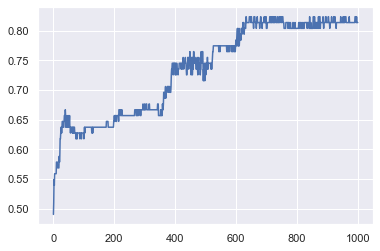

In [8]:
sns.lineplot(x=range(len(NNmodel_adagrad.history.history['val_accuracy'])),y=NNmodel_adagrad.history.history['val_accuracy']);

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


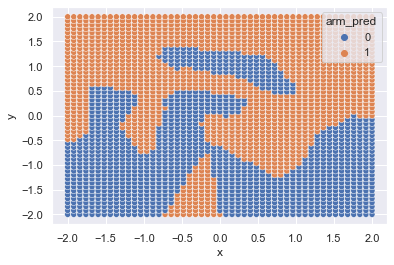

In [9]:
grid = np.linspace(-2,2,num=51)
xg = np.zeros(51**2)
yg = np.zeros(51**2)
k=0
for x in range(51):
    for y in range(51):
        xg[k]=grid[x]
        yg[k]=grid[y]
        k+=1

xy = np.zeros((51**2,2))
xy[:,0]=xg
xy[:,1]=yg

pred = (NNmodel_adagrad.predict(xy)> 0.5).astype(int)

df = pd.DataFrame({'x':xg,'y':yg,'arm_pred':pred.transpose()[0]})
sns.scatterplot(data=df,x='x',y='y',hue='arm_pred');

In [10]:
NNmodel_adam = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8,activation=tf.nn.relu,input_shape=xshape,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=11511)),
    tf.keras.layers.Dense(8,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=20)),
    tf.keras.layers.Dense(8,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=25)),
    tf.keras.layers.Dense(4,activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=30)),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=35))])

NNmodel_adam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [11]:
NNmodel_adam.fit(xtrain,ytrain,epochs=1000,batch_size=10,validation_data = (xtest,ytest),verbose=0);

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the Tenso

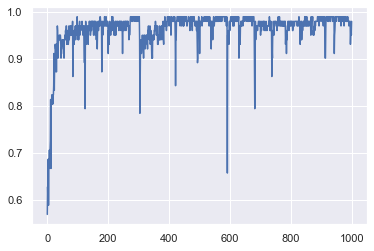

In [12]:
sns.lineplot(x=range(len(NNmodel_adam.history.history['val_accuracy'])),y=NNmodel_adam.history.history['val_accuracy']);

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


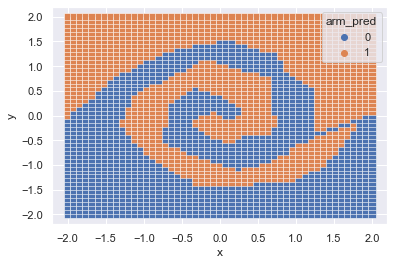

In [13]:
pred_adam = (NNmodel_adam.predict(xy)>0.5).astype(int)

df_adam = pd.DataFrame({'x':xg,'y':yg,'arm_pred':pred_adam.transpose()[0]})
sns.scatterplot(data=df_adam,x='x',y='y',hue='arm_pred',s=50,marker='s');